# Designing a three layered Neural Network from scratch
This code is written while learning about designing a Neural Network from scratch from http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

In [12]:
# Importing various helpful modules
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import linear_model
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)

## Generating a dataset

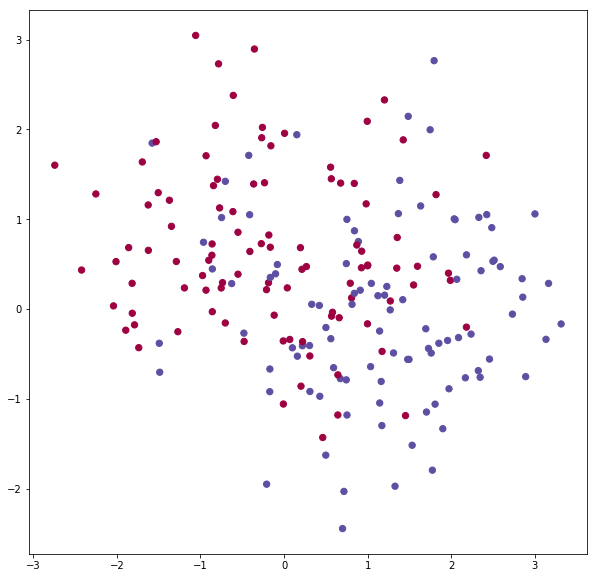

In [76]:
# Generate dataset and plot it
X, y = sklearn.datasets.make_moons(200, noise = 0.9)
plt.scatter(X[:,0], X[:,1], s = 40, c=y, cmap=plt.cm.Spectral)

## Logistic Regression

In [62]:
# Train the Logistic Regression Classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [63]:
def plot_decision_boundary(pred_func): 
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01 
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral) 
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

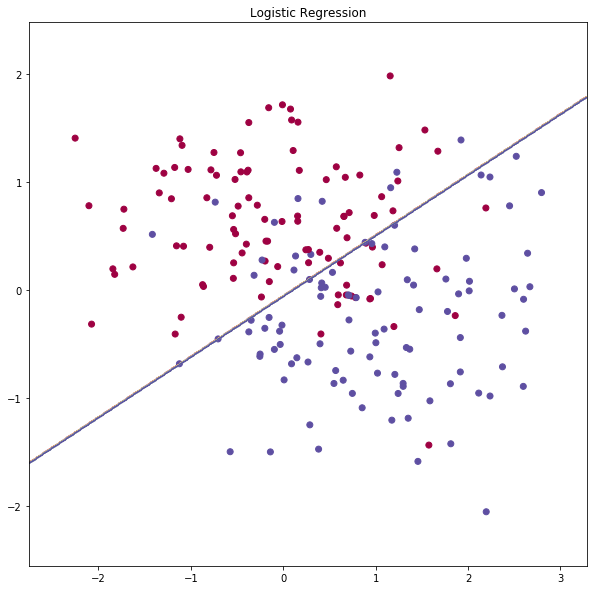

In [64]:
# Plot the Decision Boundry
plot_decision_boundry(lambda x:clf.predict(x))
plt.title('Logistic Regression')

In [77]:
## Neural Network implementaion
num_examples = len(X) # training size set
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent pareameters
epsilon = 0.01 # Learning rate
reg_lambda = 0.01 # regularization strength

def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propogation to calculate predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_score = np.exp(z2)
    probs = exp_score/np.sum(exp_score, axis = 1, keepdims=True)
    # Calculating the loss
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    # Add regularization term to the loss
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [78]:
# Helper function to predict output
def predict(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propogation to calculate predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_score = np.exp(z2)
    probs = exp_score/np.sum(exp_score, axis = 1, keepdims=True)
    return np.argmax(probs, axis = 1)

In [79]:
# This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes = 200000, print_loss = False):
    
    #Initialize the parameters to random values
    W1 = np.random.randn(nn_input_dim, nn_hdim)/ np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim)/np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    # This is what is returned at the end
    model = {}

    # Gradient descent for each batch
    for i in range(num_passes):
        # Forward prop
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores/np.sum(exp_scores, axis = 1, keepdims=True)
        
        # Backprop
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis = 0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis = 0)
        
        # Add regularization term
        dW1 += reg_lambda * W1
        dW2 += reg_lambda * W2
        
        # Gradient descent parameter update
        W1 += - epsilon * dW1
        b1 += - epsilon * db1        
        W2 += - epsilon * dW2
        b2 += - epsilon * db2        
        
        # Assign new parameters to the model
        model = {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2}
        
        # Optionally print loss
        if print_loss and i%1000 == 0:
            print('Loss after iteration {} : {}'.format(i, calculate_loss(model)))
            
    return model

Text(0.5,1,'Decision boundry for hidden layer size 100')

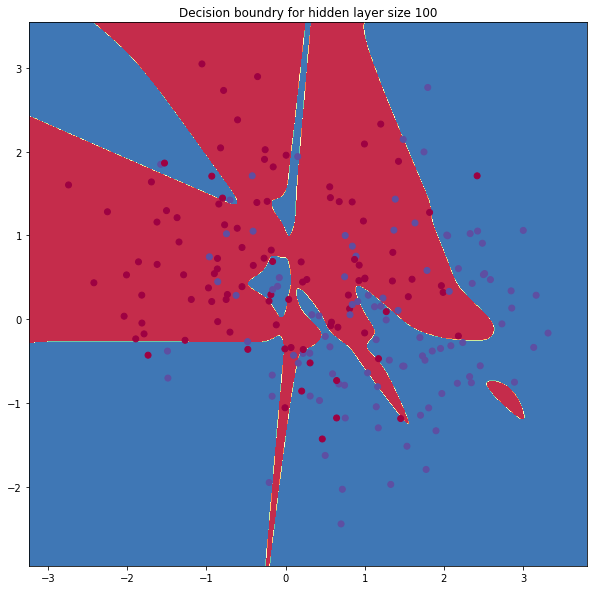

In [83]:
#Build a model with a hid-D hidden layer
hid = 100
model = build_model(hid,num_passes=1000000, print_loss = False)

# Plot the decision boundry
plot_decision_boundary(lambda x:predict(model, x))
plt.title("Decision boundry for hidden layer size {}".format(hid))